In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("Topludata.csv")

# EDA (Exploratory Data Analysis) and Data Preprocessing

In [4]:
df.head()

,Fiyat,marka,model,motor,yıl,yakıt,vites,km,hasar,renk,camtavan
0,21168800,Mercedes-Benz,S,500 500 L,2022,Benzin,Otomatik,-,0,Siyah,Var
1,21050250,Mercedes-Benz,AMG GT,4.0 S,2020,Benzin,Otomatik,14000,0,Gri,Var
2,18315300,Mercedes-Benz,S,400 AMG,2022,Dizel,Otomatik,-,0,Siyah,Var
3,17427300,Mercedes-Benz,S,400 400 L,2022,Dizel,Otomatik,-,0,Siyah,Var
4,17392500,Mercedes-Benz,S,400 400 L,2022,Dizel,Otomatik,50,0,Siyah,Var


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28114 entries, 0 to 28113
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fiyat     28114 non-null  int64 
 1   marka     28114 non-null  object
 2   model     28114 non-null  object
 3   motor     28114 non-null  object
 4   yıl       28114 non-null  int64 
 5   yakıt     28114 non-null  object
 6   vites     28114 non-null  object
 7   km        28114 non-null  object
 8   hasar     28114 non-null  int64 
 9   renk      28114 non-null  object
 10  camtavan  28114 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.4+ MB


In [6]:
df.yakıt.value_counts()

  Dizel              9118
  LPG & Benzin       8140
  Benzin             4816
Dizel                3008
Benzin               2725
LPG & Benzin          294
  Hibrit                7
  Elektrik              6
Name: yakıt, dtype: int64

In [7]:
df.vites.value_counts()

  Düz                 10425
Düz                    5475
  Otomatik             5219
  Yarı Otomatik        4657
Otomatik               1567
Yarı Otomatik           771
Name: vites, dtype: int64

In [5]:
df['yakıt'] = df['yakıt'].str.strip()
df['vites'] = df['vites'].str.strip()
df['model'] = df['model'].str.strip()

df['yakıt'] = df['yakıt'].str.replace(' ', '')
df['vites'] = df['vites'].str.replace(' ', '')
df['model'] = df['model'].str.replace(' ', '')

df['yakıt'] = df['yakıt'].str.replace('-', '')
df['vites'] = df['vites'].str.replace('-', '')
df['model'] = df['model'].str.replace('-', '')
df['marka'] = df['marka'].str.replace('-', '')

df['yakıt'] = df['yakıt'].str.replace('&', '')

In [9]:
df.yakıt.value_counts()

Dizel        12126
LPGBenzin     8434
Benzin        7541
Hibrit           7
Elektrik         6
Name: yakıt, dtype: int64

In [10]:
df.vites.value_counts()

Düz             15900
Otomatik         6786
YarıOtomatik     5428
Name: vites, dtype: int64

<Axes: xlabel='Fiyat', ylabel='marka'>

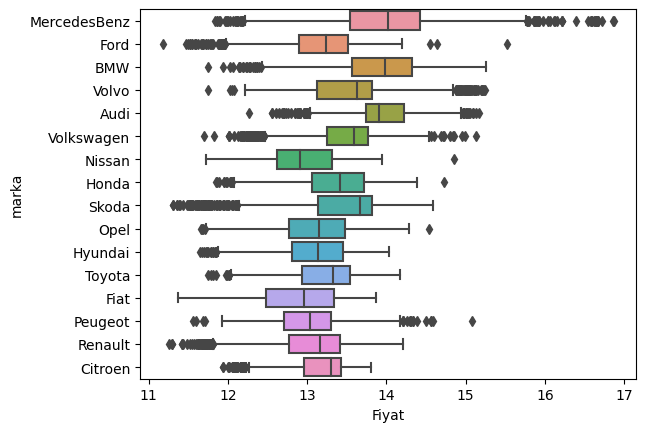

In [11]:
sns.boxplot(x=(np.log(df.Fiyat)),y='marka', data=df)   #Grafiğin okunurluğunu artırmak amacıyla fiyatın log değeri alınmıştır.

<Axes: xlabel='Fiyat', ylabel='vites'>

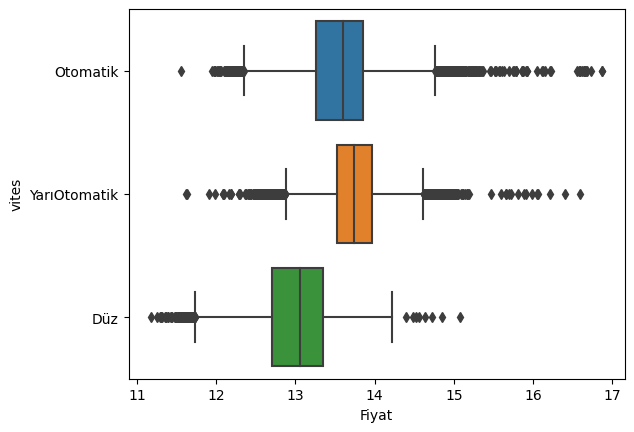

In [12]:
sns.boxplot(x=(np.log(df.Fiyat)),y='vites', data=df)

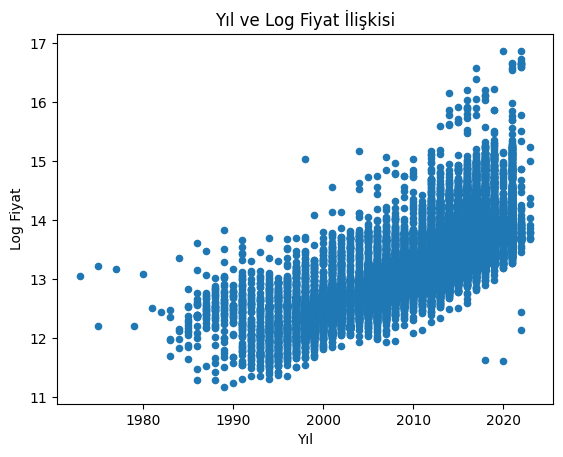

In [13]:
df['Log_Fiyat'] = np.log(df['Fiyat'])

df.plot.scatter(x='yıl', y='Log_Fiyat')
plt.xlabel('Yıl')
plt.ylabel('Log Fiyat')
plt.title('Yıl ve Log Fiyat İlişkisi')
plt.show()

df = df.drop('Log_Fiyat', axis=1)

<Axes: xlabel='Fiyat', ylabel='Count'>

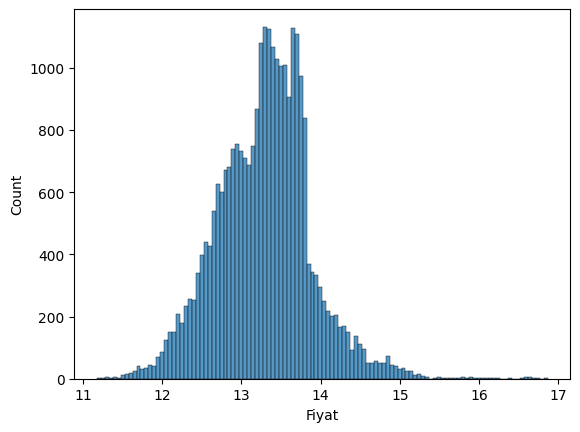

In [14]:
sns.histplot(np.log(df.Fiyat))

Finding out Outliers with IQR and Z-Score








<Axes: >

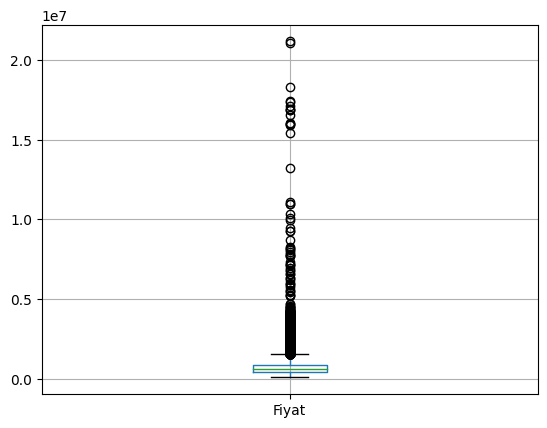

In [15]:
df.boxplot(column='Fiyat')

In [16]:
df.Fiyat.describe()

count    2.811400e+04
mean     7.192620e+05
std      6.713074e+05
min      7.150000e+04
25%      3.994500e+05
50%      6.091750e+05
75%      8.551000e+05
max      2.116880e+07
Name: Fiyat, dtype: float64

In [17]:
#IQR
q1 = df.Fiyat.quantile(0.25)
q3 = df.Fiyat.quantile(0.75)
IQR = q3-q1
print(q1,q3, IQR)
upper_bound=q3+1.5*IQR
lower_bound=q1-1.5*IQR
print(upper_bound,lower_bound)

399450.0 855100.0 455650.0
1538575.0 -284025.0


In [18]:
df[df.Fiyat>upper_bound]

,Fiyat,marka,model,motor,yıl,yakıt,vites,km,hasar,renk,camtavan
0,21168800,MercedesBenz,S,500 500 L,2022,Benzin,Otomatik,-,0,Siyah,Var
1,21050250,MercedesBenz,AMGGT,4.0 S,2020,Benzin,Otomatik,14000,0,Gri,Var
2,18315300,MercedesBenz,S,400 AMG,2022,Dizel,Otomatik,-,0,Siyah,Var
3,17427300,MercedesBenz,S,400 400 L,2022,Dizel,Otomatik,-,0,Siyah,Var
4,17392500,MercedesBenz,S,400 400 L,2022,Dizel,Otomatik,50,0,Siyah,Var
...,...,...,...,...,...,...,...,...,...,...,...
27982,3534800,Peugeot,407,1.6,2007,Benzin,Düz,260000,0,Gri,Var
27983,2467350,Volkswagen,Passat,1.6,2021,Dizel,YarıOtomatik,4500,0,Siyah,Var
27987,2185500,Volkswagen,Passat,1.6,2021,Dizel,YarıOtomatik,1790,0,Siyah,Var
27988,2168850,Skoda,SuperB,1.6,2021,Dizel,YarıOtomatik,-,0,Gri,Var


In [19]:
#Z-Score

stdev=df.Fiyat.std()
mean=df.Fiyat.mean()

df['std_Fiyat']=(df.Fiyat-mean)/stdev
df[df.std_Fiyat>3].marka.value_counts()

filtered_df = df[(((df['marka'] == 'Volkswagen') | (df['marka'] == 'Ford') | (df['marka'] == 'Nissan') | (df['marka'] == 'Peugeot'))  & (df['std_Fiyat'] > 3))]
print(filtered_df)

df = df.drop('std_Fiyat', axis=1)


         Fiyat       marka    model                 motor   yıl   yakıt  \
51     5541250        Ford  Mustang    2.3 Convertible     2016  Benzin   
109    3741500  Volkswagen   Arteon                     2  2018   Dizel   
199    3230250  Volkswagen   Arteon                     2  2020   Dizel   
226    3116600  Volkswagen   Arteon                     2  2020   Dizel   
239    2800000  Volkswagen   Arteon                     2  2020   Dizel   
329    2826000      Nissan     350Z                   Cou  2007  Benzin   
330    2823050  Volkswagen   Arteon                     2  2018   Dizel   
27982  3534800     Peugeot      407                   1.6  2007  Benzin   

              vites      km  hasar      renk camtavan  std_Fiyat  
51         Otomatik   52000      0     Beyaz      Var   7.182981  
109    YarıOtomatik   97000  21858       Gri      Var   4.502018  
199    YarıOtomatik   41000      0       Gri      Var   3.740444  
226    YarıOtomatik   31000      0  Lacivert      Var   

*As a result of the outlier analysis, it was commented that these values are compatible with the features and it would be more accurate to keep them in the data frame.*

**Data Cleaning and Preprocessing**

In [6]:
# Numerik olmayan 'km' verileri tespit edilmiştir.
# Numerik olan değerler üzerinden 1 yılda yapılan ortalama km hesaplanmıştır.
# Numerik olmayan hücrelere bulunan 'yıllık ort km' değeri o aracın yaşı ile çarpılarak numerik hale getirilmiştir.
# 2022 ve üstü model araçlardan km değeri '-' olanlar için ise km değerleri 0 ile replace edilmiştir.

non_numeric_df = df[df['km'].str.isnumeric() == False]
non_numeric_df['km']=non_numeric_df.km.str.strip()
non_numeric_df

<ipython-input-6-f0cb3990ef06>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric_df['km']=non_numeric_df.km.str.strip()


,Fiyat,marka,model,motor,yıl,yakıt,vites,km,hasar,renk,camtavan
0,21168800,MercedesBenz,S,500 500 L,2022,Benzin,Otomatik,-,0,Siyah,Var
2,18315300,MercedesBenz,S,400 AMG,2022,Dizel,Otomatik,-,0,Siyah,Var
3,17427300,MercedesBenz,S,400 400 L,2022,Dizel,Otomatik,-,0,Siyah,Var
5,17114350,MercedesBenz,S,400 400 L,2021,Dizel,Otomatik,-,0,Beyaz,Var
7,16861050,MercedesBenz,S,400 AMG,2022,Dizel,Otomatik,-,0,Siyah,Var
...,...,...,...,...,...,...,...,...,...,...,...
27955,253750,Volvo,S40,1.9,1999,LPGBenzin,Otomatik,-,0,Beyaz,Yok
27960,128950,Nissan,LaurelAltima,2,1991,LPGBenzin,Düz,-,1694,Siyah,Yok
27977,1999999,Volkswagen,Passat,1.5,2021,Benzin,YarıOtomatik,-,1249,Siyah,Var
27988,2168850,Skoda,SuperB,1.6,2021,Dizel,YarıOtomatik,-,0,Gri,Var


In [7]:
non_numeric_df.km.value_counts()

-                     473
                       21
Takasa Uygun Değil      8
054135469********       1
32 DR 471               1
01buf43                 1
66lf195                 1
34 ram 60               1
Takasa Uygun            1
Name: km, dtype: int64

In [8]:
grouped = non_numeric_df.groupby('km')
summary = grouped['yıl'].mean()
print(summary)

km
                      2016.000000
-                     2010.987315
01buf43               2011.000000
054135469********     2017.000000
32 DR 471             2019.000000
34 ram 60             1983.000000
66lf195               1989.000000
Takasa Uygun          1999.000000
Takasa Uygun Değil    2006.625000
Name: yıl, dtype: float64


In [9]:
numeric_df=df[df['km'].str.isnumeric() == True]
numeric_df.info()
numeric_df['km'] = pd.to_numeric(df['km'], errors='coerce')
numeric_df['yillikOrtKm']=numeric_df.km/(2024-numeric_df.yıl)
numeric_df.head()
ortYıllıkKm=numeric_df['yillikOrtKm'].mean()
print('Bir yılda yapılan ort km: ',ortYıllıkKm)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27606 entries, 1 to 28113
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fiyat     27606 non-null  int64 
 1   marka     27606 non-null  object
 2   model     27606 non-null  object
 3   motor     27606 non-null  object
 4   yıl       27606 non-null  int64 
 5   yakıt     27606 non-null  object
 6   vites     27606 non-null  object
 7   km        27606 non-null  object
 8   hasar     27606 non-null  int64 
 9   renk      27606 non-null  object
 10  camtavan  27606 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.5+ MB
Bir yılda yapılan ort km:  14975.505612868512


<ipython-input-9-6b52e1cc72a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['km'] = pd.to_numeric(df['km'], errors='coerce')
<ipython-input-9-6b52e1cc72a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['yillikOrtKm']=numeric_df.km/(2024-numeric_df.yıl)


In [10]:
non_numeric_df['km']= np.where((non_numeric_df['yıl'] > 2021) & (non_numeric_df['km'] =="-"), 0, (2024-non_numeric_df['yıl'])*14975 )
non_numeric_df.head()

<ipython-input-10-e43c106845b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric_df['km']= np.where((non_numeric_df['yıl'] > 2021) & (non_numeric_df['km'] =="-"), 0, (2024-non_numeric_df['yıl'])*14975 )


,Fiyat,marka,model,motor,yıl,yakıt,vites,km,hasar,renk,camtavan
0,21168800,MercedesBenz,S,500 500 L,2022,Benzin,Otomatik,0,0,Siyah,Var
2,18315300,MercedesBenz,S,400 AMG,2022,Dizel,Otomatik,0,0,Siyah,Var
3,17427300,MercedesBenz,S,400 400 L,2022,Dizel,Otomatik,0,0,Siyah,Var
5,17114350,MercedesBenz,S,400 400 L,2021,Dizel,Otomatik,44925,0,Beyaz,Var
7,16861050,MercedesBenz,S,400 AMG,2022,Dizel,Otomatik,0,0,Siyah,Var


In [11]:
numeric_df = numeric_df.drop(columns=['yillikOrtKm'])
df=numeric_df.append(non_numeric_df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28114 entries, 1 to 28046
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fiyat     28114 non-null  int64  
 1   marka     28114 non-null  object 
 2   model     28114 non-null  object 
 3   motor     28114 non-null  object 
 4   yıl       28114 non-null  int64  
 5   yakıt     28114 non-null  object 
 6   vites     28114 non-null  object 
 7   km        28114 non-null  float64
 8   hasar     28114 non-null  int64  
 9   renk      28114 non-null  object 
 10  camtavan  28114 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.6+ MB


<ipython-input-11-5055892fd2aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=numeric_df.append(non_numeric_df)


,Fiyat,marka,model,motor,yıl,yakıt,vites,km,hasar,renk,camtavan
1,21050250,MercedesBenz,AMGGT,4.0 S,2020,Benzin,Otomatik,14000.0,0,Gri,Var
4,17392500,MercedesBenz,S,400 400 L,2022,Dizel,Otomatik,50.0,0,Siyah,Var
6,16955500,MercedesBenz,AMGGT,3,2021,Benzin,Otomatik,750.0,0,Gri,Var
8,16834950,MercedesBenz,S,400 400 L,2022,Dizel,Otomatik,17.0,0,Siyah,Var
11,15990400,MercedesBenz,S,400 400 L,2022,Dizel,Otomatik,50.0,0,Siyah,Var


In [12]:
df.loc[14] #test

Fiyat           15411000
marka       MercedesBenz
model              AMGGT
motor                  3
yıl                 2021
yakıt             Benzin
vites           Otomatik
km               44925.0
hasar                  0
renk               Beyaz
camtavan             Var
Name: 14, dtype: object

In [13]:
# İçerisinde hem numerik hem metin bulunan motor verileri için split yapılarak önce numerik hale getirme işlemi yapılmıştır.
# Hala string olan veya boş olan değerlere ise ortalama motor değeri bulunarak bu değer yazılmıştır.
# 1.6 , 1.5 yerine 4000, 5000 motor gibi olan değerler için ise scaling yapılmıştır.
split_data = df['motor'].str.split(expand=True)
print(split_data)
split_1 = split_data[[0]]
split_1.columns = ['Column1']
print(split_1)
split_1.value_counts()

         0     1     2     3     4     5
1      4.0     S  None  None  None  None
4      400   400     L  None  None  None
6        3  None  None  None  None  None
8      400   400     L  None  None  None
11     400   400     L  None  None  None
...    ...   ...   ...   ...   ...   ...
27955  1.9  None  None  None  None  None
27960    2  None  None  None  None  None
27977  1.5  None  None  None  None  None
27988  1.6  None  None  None  None  None
28046  2.8  None  None  None  None  None

[28114 rows x 6 columns]
      Column1
1         4.0
4         400
6           3
8         400
11        400
...       ...
27955     1.9
27960       2
27977     1.5
27988     1.6
28046     2.8

[28114 rows x 1 columns]


Column1
1.6        11487
1.4         5143
1.5         2718
1.3         1698
1.2         1474
           ...  
635d           1
316C           1
430            1
Cou            1
330d           1
Length: 128, dtype: int64

In [14]:
motor_new_df = pd.DataFrame(split_1)
numeric_values = pd.to_numeric(motor_new_df['Column1'], errors='coerce')
numeric_df = motor_new_df.apply(pd.to_numeric, errors='coerce').fillna(0)
print(numeric_df)
numeric_df.value_counts()
sorted_df = numeric_df.sort_values(by='Column1', ascending=False)
sorted_df.value_counts()
sorted_df ['Column1'] =np.where((sorted_df['Column1']>100), sorted_df['Column1']/100, sorted_df['Column1'])
print(sorted_df)
print(sorted_df.value_counts())
non_zero_values = sorted_df[sorted_df['Column1'] != 0]
average_non_zero = non_zero_values['Column1'].mean()
print("Sıfır Hariç Değerlerin Ortalaması:", average_non_zero)

sorted_df ['Column1'] = np.where(sorted_df['Column1'] > 10, sorted_df['Column1']/10 , sorted_df['Column1'])
sorted_df ['Column1'] = np.where(sorted_df['Column1'] == 0, 1.64, sorted_df['Column1'])
print(sorted_df.value_counts())


       Column1
1          4.0
4        400.0
6          3.0
8        400.0
11       400.0
...        ...
27955      1.9
27960      2.0
27977      1.5
27988      1.6
28046      2.8

[28114 rows x 1 columns]
       Column1
26709      5.6
27784      5.6
27335      5.6
27269      5.6
26489      5.6
...        ...
24377      0.0
409        0.0
2401       0.0
17269      0.0
1220       0.0

[28114 rows x 1 columns]
Column1
1.600      11488
1.400       5143
1.500       2718
0.000       2314
1.300       1698
2.000       1496
1.200       1474
1.800        527
1.000        293
1.900        157
2.500        130
3.500        100
2.200         90
1.250         77
3.200         61
3.000         51
2.400         49
1.700         33
0.900         33
4.000         31
70.000        30
2.700         26
5.000         20
1.100         16
1.350         14
2.800         11
2.300         10
5.600          8
1.360          3
60.000         2
2.306          2
3.160          2
2.900          2
4.300          1
4.

In [15]:
df = pd.concat([df, sorted_df], axis=1)
df = df.drop(columns=['motor'])
df.rename(columns={'Column1': 'motor_new'}, inplace=True)

df.head()

,Fiyat,marka,model,yıl,yakıt,vites,km,hasar,renk,camtavan,motor_new
1,21050250,MercedesBenz,AMGGT,2020,Benzin,Otomatik,14000.0,0,Gri,Var,4.0
4,17392500,MercedesBenz,S,2022,Dizel,Otomatik,50.0,0,Siyah,Var,4.0
6,16955500,MercedesBenz,AMGGT,2021,Benzin,Otomatik,750.0,0,Gri,Var,3.0
8,16834950,MercedesBenz,S,2022,Dizel,Otomatik,17.0,0,Siyah,Var,4.0
11,15990400,MercedesBenz,S,2022,Dizel,Otomatik,50.0,0,Siyah,Var,4.0


In [30]:
df.loc[17] #test

Fiyat            10993050
marka        MercedesBenz
model            MaybachS
yıl                  2016
yakıt              Benzin
vites        YarıOtomatik
km               148000.0
hasar                   0
renk                Beyaz
camtavan              Var
motor_new            1.64
Name: 17, dtype: object

In [16]:
df.info()
df.head()

# km ve motor featureları tamamen numerik hale getirilmiş oldu.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28114 entries, 1 to 28046
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fiyat      28114 non-null  int64  
 1   marka      28114 non-null  object 
 2   model      28114 non-null  object 
 3   yıl        28114 non-null  int64  
 4   yakıt      28114 non-null  object 
 5   vites      28114 non-null  object 
 6   km         28114 non-null  float64
 7   hasar      28114 non-null  int64  
 8   renk       28114 non-null  object 
 9   camtavan   28114 non-null  object 
 10  motor_new  28114 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 2.6+ MB


,Fiyat,marka,model,yıl,yakıt,vites,km,hasar,renk,camtavan,motor_new
1,21050250,MercedesBenz,AMGGT,2020,Benzin,Otomatik,14000.0,0,Gri,Var,4.0
4,17392500,MercedesBenz,S,2022,Dizel,Otomatik,50.0,0,Siyah,Var,4.0
6,16955500,MercedesBenz,AMGGT,2021,Benzin,Otomatik,750.0,0,Gri,Var,3.0
8,16834950,MercedesBenz,S,2022,Dizel,Otomatik,17.0,0,Siyah,Var,4.0
11,15990400,MercedesBenz,S,2022,Dizel,Otomatik,50.0,0,Siyah,Var,4.0


In [32]:
dmodel=sorted(df.model.unique())
dmodel=pd.DataFrame(dmodel)
dmodel

,0
0,1007
1,100NX
2,107
3,190
4,1Serisi
...,...
212,i20Troy
213,i30
214,i40
215,iSerisi


**One Hot Encoding - Dummification**   for categoric features




In [17]:
dummies= pd.get_dummies(df[['marka','model','yakıt','vites','renk','camtavan']],drop_first=True)
dfProcessed= pd.concat(([df,dummies]),axis=1)
dfProcessed = dfProcessed.drop(columns=['marka','model','yakıt','vites','renk','camtavan'])
dfProcessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28114 entries, 1 to 28046
Columns: 250 entries, Fiyat to camtavan_Yok
dtypes: float64(2), int64(3), uint8(245)
memory usage: 7.9 MB


**Model Building** (backward selection)

In [18]:
from sklearn.model_selection import train_test_split
X=dfProcessed.drop(columns='Fiyat')
y=dfProcessed.Fiyat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lrModel = lr.fit(X_train,y_train)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Training RMSE
np.sqrt(mean_squared_error(y_train, lrModel.predict(X_train)))

367555.3803489445

In [21]:
#Training r2
r2_score(y_train, lrModel.predict(X_train))

0.7100736841333598

In [27]:
#Test r2
print (r2_score(y_test, lrModel.predict(X_test)))

0.6805213437634394


In [26]:
#Test RMSE and MAE
from sklearn.metrics import mean_absolute_error
rmse= np.sqrt(mean_squared_error(y_test, lrModel.predict(X_test)))
mae = mean_absolute_error(y_test, lrModel.predict(X_test))
print('Test RMSE: ', rmse)
print('Test MAE:  ', mae)

Test RMSE:  352668.81765542843
Test MAE:   142938.0512465061


In [43]:
column_names = '+'.join(dfProcessed.columns)
print(column_names)

Fiyat+yıl+km+hasar+motor_new+marka_BMW+marka_Citroen+marka_Fiat+marka_Ford+marka_Honda+marka_Hyundai+marka_MercedesBenz+marka_Nissan+marka_Opel+marka_Peugeot+marka_Renault+marka_Skoda+marka_Toyota+marka_Volkswagen+marka_Volvo+model_100NX+model_107+model_190+model_1Serisi+model_200+model_205+model_206+model_206++model_207+model_208+model_230+model_240+model_250+model_260+model_2Serisi+model_300+model_301+model_306+model_307+model_308+model_350Z+model_3Serisi+model_405+model_406+model_407+model_420+model_460+model_4Serisi+model_500+model_500Ailesi+model_508+model_5Serisi+model_605+model_607+model_6Serisi+model_740+model_7Serisi+model_806+model_850+model_940+model_960+model_A+model_A3+model_A4+model_A5+model_A6+model_AMGGT+model_Accent+model_AccentBlue+model_AccentEra+model_Accord+model_Adam+model_Albea+model_Almera+model_Altima+model_Arteon+model_Ascona+model_Astra+model_Atos+model_Auris+model_Avensis+model_B+model_BMax+model_Bluebird+model_Bora+model_Brava+model_Bravo+model_C+model_C3+m

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dfTrain, dfTest = train_test_split(dfProcessed,test_size=0.20, random_state=42)

model = smf.ols(formula="Fiyat~yıl+km+hasar+motor_new+marka_BMW+marka_Citroen+marka_Fiat+marka_Ford+marka_Honda+marka_Hyundai+marka_MercedesBenz+marka_Nissan+marka_Opel+marka_Peugeot+marka_Renault+marka_Skoda+marka_Toyota+marka_Volkswagen+marka_Volvo+model_100NX+model_107+model_190+model_1Serisi+model_200+model_205+model_206+model_206++model_207+model_208+model_230+model_240+model_250+model_260+model_2Serisi+model_300+model_301+model_306+model_307+model_308+model_350Z+model_3Serisi+model_405+model_406+model_407+model_420+model_460+model_4Serisi+model_500+model_500Ailesi+model_508+model_5Serisi+model_605+model_607+model_6Serisi+model_740+model_7Serisi+model_806+model_850+model_940+model_960+model_A+model_A3+model_A4+model_A5+model_A6+model_AMGGT+model_Accent+model_AccentBlue+model_AccentEra+model_Accord+model_Adam+model_Albea+model_Almera+model_Altima+model_Arteon+model_Ascona+model_Astra+model_Atos+model_Auris+model_Avensis+model_B+model_BMax+model_Bluebird+model_Bora+model_Brava+model_Bravo+model_C+model_C3+model_C30+model_C3Picasso+model_C4+model_C4Picasso+model_C5+model_C70+model_CElysee+model_CL+model_CLA+model_CLC+model_CLK+model_CLS+model_CMax+model_CRX+model_CRZ+model_Camry+model_Carina+model_City+model_Civic+model_Clio+model_Corolla+model_Corona+model_Corsa+model_Coupe+model_Cressida+model_E+model_EOS+model_Egea+model_Elantra+model_Escort+model_Excel+model_Fabia+model_Favorit+model_Felicia+model_Festiva+model_Fiesta+model_Fluence+model_Focus+model_Forman+model_Fusion+model_GTR+model_Galaxy+model_Genesis+model_Getz+model_Golf+model_GrandScenic+model_Idea+model_Insignia+model_Integra+model_Ioniq+model_Jazz+model_Jetta+model_Ka+model_Kadett+model_Laguna+model_Latitude+model_LaurelAltima+model_Legend+model_Linea+model_MSerisi+model_Marea+model_Matrix+model_Maxima+model_MaybachS+model_Megane+model_Meriva+model_Micra+model_Modus+model_Mondeo+model_Mustang+model_NXCoupe+model_NewBeetle+model_Note+model_Octavia+model_Omega+model_Palio+model_Panda+model_Passat+model_PassatVariant+model_Polo+model_Prelude+model_Primera+model_Prius+model_Pulsar+model_Punto+model_R+model_R19+model_R21+model_R5+model_R9+model_RCZ+model_Rapid+model_Roomster+model_S+model_S2000+model_S40+model_S60+model_S70+model_S80+model_S90+model_SL+model_SLC+model_SLK+model_SMax+model_Saxo+model_Scala+model_Scenic+model_Scirocco+model_Siena+model_Sierra+model_Sonata+model_Starlet+model_Stilo+model_Sunny+model_SuperB+model_Symbol+model_Talisman+model_Taunus+model_Tempra+model_Tigra+model_Tipo+model_Touran+model_Twingo+model_Uno+model_UrbanCruiser+model_V40+model_V40CrossCountry+model_V50+model_V60+model_V60CrossCountry+model_V70+model_V90CrossCountry+model_VWCC+model_Vectra+model_Vento+model_Verso+model_Yaris+model_ZSerisi+model_Zafira+model_i10+model_i20+model_i20Active+model_i20Troy+model_i30+model_i40+model_iSerisi+model_ix20+yakıt_Dizel+yakıt_Elektrik+yakıt_Hibrit+yakıt_LPGBenzin+vites_Otomatik+vites_YarıOtomatik+renk_Füme+renk_Gri+renk_Kırmızı+renk_Lacivert+renk_Mavi+renk_Siyah+renk_Yeşil+camtavan_Yok",data=dfTrain)
results =model.fit()



In [45]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     235.0
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:04:54   Log-Likelihood:            -3.2013e+05
No. Observations:               22491   AIC:                         6.407e+05
Df Residuals:                   22258   BIC:                         6.426e+05
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.631e+

Feature Selection (backward selection)

In [48]:
dfcorr = dfProcessed[['Fiyat','yıl', 'km', 'hasar', 'motor_new']].corr()


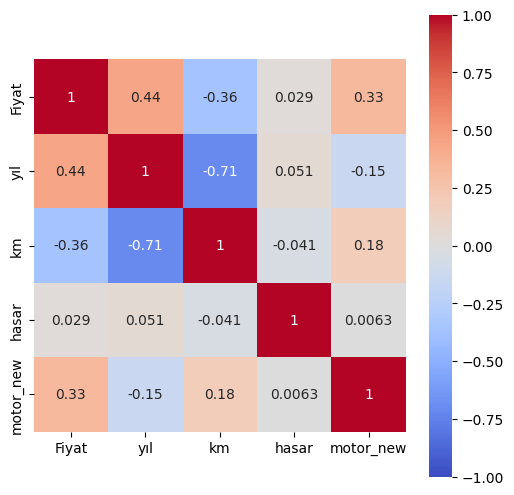

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(dfcorr, vmin=-1, vmax=1, center=0, square=True, annot=True, cmap='coolwarm')
plt.show()

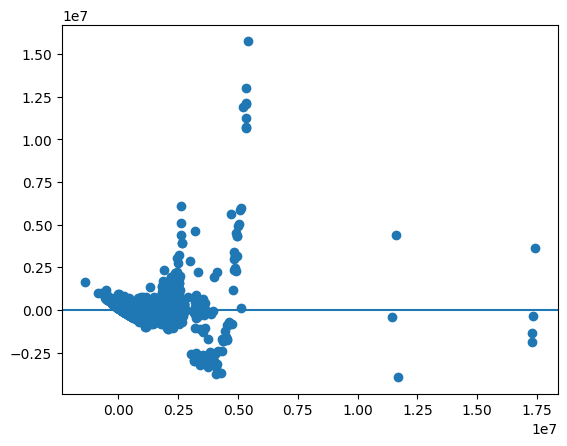

In [50]:
#residual plot

plt.scatter(results.fittedvalues, results.resid)
plt.axhline()
plt.show()

In [51]:
# 'yıl' ve 'km' korele olduğundan 'km' modelden çıkarıldı.
# 'renk' feature'ının p-value değerleri yüksek olduğundan renkler de modelden çıkarıldı.

model = smf.ols(formula="Fiyat~yıl+hasar+motor_new+marka_BMW+marka_Citroen+marka_Fiat+marka_Ford+marka_Honda+marka_Hyundai+marka_MercedesBenz+marka_Nissan+marka_Opel+marka_Peugeot+marka_Renault+marka_Skoda+marka_Toyota+marka_Volkswagen+marka_Volvo+model_100NX+model_107+model_190+model_1Serisi+model_200+model_205+model_206+model_206++model_207+model_208+model_230+model_240+model_250+model_260+model_2Serisi+model_300+model_301+model_306+model_307+model_308+model_350Z+model_3Serisi+model_405+model_406+model_407+model_420+model_460+model_4Serisi+model_500+model_500Ailesi+model_508+model_5Serisi+model_605+model_607+model_6Serisi+model_740+model_7Serisi+model_806+model_850+model_940+model_960+model_A+model_A3+model_A4+model_A5+model_A6+model_AMGGT+model_Accent+model_AccentBlue+model_AccentEra+model_Accord+model_Adam+model_Albea+model_Almera+model_Altima+model_Arteon+model_Ascona+model_Astra+model_Atos+model_Auris+model_Avensis+model_B+model_BMax+model_Bluebird+model_Bora+model_Brava+model_Bravo+model_C+model_C3+model_C30+model_C3Picasso+model_C4+model_C4Picasso+model_C5+model_C70+model_CElysee+model_CL+model_CLA+model_CLC+model_CLK+model_CLS+model_CMax+model_CRX+model_CRZ+model_Camry+model_Carina+model_City+model_Civic+model_Clio+model_Corolla+model_Corona+model_Corsa+model_Coupe+model_Cressida+model_E+model_EOS+model_Egea+model_Elantra+model_Escort+model_Excel+model_Fabia+model_Favorit+model_Felicia+model_Festiva+model_Fiesta+model_Fluence+model_Focus+model_Forman+model_Fusion+model_GTR+model_Galaxy+model_Genesis+model_Getz+model_Golf+model_GrandScenic+model_Idea+model_Insignia+model_Integra+model_Ioniq+model_Jazz+model_Jetta+model_Ka+model_Kadett+model_Laguna+model_Latitude+model_LaurelAltima+model_Legend+model_Linea+model_MSerisi+model_Marea+model_Matrix+model_Maxima+model_MaybachS+model_Megane+model_Meriva+model_Micra+model_Modus+model_Mondeo+model_Mustang+model_NXCoupe+model_NewBeetle+model_Note+model_Octavia+model_Omega+model_Palio+model_Panda+model_Passat+model_PassatVariant+model_Polo+model_Prelude+model_Primera+model_Prius+model_Pulsar+model_Punto+model_R+model_R19+model_R21+model_R5+model_R9+model_RCZ+model_Rapid+model_Roomster+model_S+model_S2000+model_S40+model_S60+model_S70+model_S80+model_S90+model_SL+model_SLC+model_SLK+model_SMax+model_Saxo+model_Scala+model_Scenic+model_Scirocco+model_Siena+model_Sierra+model_Sonata+model_Starlet+model_Stilo+model_Sunny+model_SuperB+model_Symbol+model_Talisman+model_Taunus+model_Tempra+model_Tigra+model_Tipo+model_Touran+model_Twingo+model_Uno+model_UrbanCruiser+model_V40+model_V40CrossCountry+model_V50+model_V60+model_V60CrossCountry+model_V70+model_V90CrossCountry+model_VWCC+model_Vectra+model_Vento+model_Verso+model_Yaris+model_ZSerisi+model_Zafira+model_i10+model_i20+model_i20Active+model_i20Troy+model_i30+model_i40+model_iSerisi+model_ix20+yakıt_Dizel+yakıt_Elektrik+yakıt_Hibrit+vites_Otomatik+vites_YarıOtomatik+camtavan_Yok",data=dfTrain)
results =model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     230.6
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:07:33   Log-Likelihood:            -3.2059e+05
No. Observations:               22491   AIC:                         6.416e+05
Df Residuals:                   22267   BIC:                         6.434e+05
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -9.35e+

**CatBoost Model Building**

In [52]:
#CatBoost
!pip install catboost
from catboost import CatBoostRegressor


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [53]:
# train-test split

categorical_features = ['marka', 'model','vites', 'camtavan','yakıt','renk']

X = df.drop(columns=['Fiyat'])
y = df['Fiyat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [54]:
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_features)
result = model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# RMSE, r2 and MAE
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

train_r2 = (r2_score(y_train, train_predictions))
test_r2 = (r2_score(y_test, test_predictions))

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)


print("Train RMSE:", train_rmse)
print("Train r2:", train_r2)
print("Train MAE:", train_mae)

print("Test RMSE:", test_rmse)
print("Test r2:", test_r2)
print("Test MAE:", test_mae)



0:	learn: 637030.7481732	total: 75.8ms	remaining: 1m 15s
1:	learn: 597550.6311564	total: 96.9ms	remaining: 48.4s
2:	learn: 560878.3857110	total: 125ms	remaining: 41.5s
3:	learn: 528712.8439906	total: 148ms	remaining: 36.8s
4:	learn: 500411.0737479	total: 169ms	remaining: 33.7s
5:	learn: 473546.5216060	total: 190ms	remaining: 31.5s
6:	learn: 447599.7700305	total: 214ms	remaining: 30.4s
7:	learn: 422867.0320489	total: 243ms	remaining: 30.1s
8:	learn: 402439.9561942	total: 264ms	remaining: 29.1s
9:	learn: 386175.9336116	total: 312ms	remaining: 30.9s
10:	learn: 369510.0540267	total: 362ms	remaining: 32.6s
11:	learn: 355367.8217642	total: 419ms	remaining: 34.5s
12:	learn: 342026.9475236	total: 455ms	remaining: 34.6s
13:	learn: 328848.6022546	total: 498ms	remaining: 35.1s
14:	learn: 318693.2138429	total: 548ms	remaining: 36s
15:	learn: 309825.3070991	total: 608ms	remaining: 37.4s
16:	learn: 299788.1946497	total: 646ms	remaining: 37.4s
17:	learn: 291481.4769366	total: 676ms	remaining: 36.9s
1

In [55]:
feature_importances = model.get_feature_importance()
print("Feature Importances:")
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"{feature_name}: {importance}")


Feature Importances:
marka: 16.184760391520356
model: 7.211645999030629
yıl: 23.97931994539436
yakıt: 1.1855845079686491
vites: 6.598463300742955
km: 6.53662727201795
hasar: 0.08001345595619702
renk: 0.29184558899356816
camtavan: 7.021376268761913
motor_new: 30.910363269613367


In [56]:
# Feature Selection
# importance değeri düşük olan 'yakıt', 'renk', 'hasar' feature'ları kombine edilerek modelden çıkarıldı.
# 'renk' ve 'hasar' ın çıkarıldığı, 'yakıt' ın kaldığı alternatifte en iyi skorlar elde edildi.

# train-test split
categorical_features = ['marka', 'model','vites', 'camtavan','yakıt']

X = df.drop(columns=['Fiyat', 'renk', 'hasar'])
y = df['Fiyat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#model
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_features)
result = model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# RMSE, r2 and MAE
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

train_r2 = (r2_score(y_train, train_predictions))
test_r2 = (r2_score(y_test, test_predictions))

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)


print("Train RMSE:", train_rmse)
print("Train r2:", train_r2)
print("Train MAE:", train_mae)

print("Test RMSE:", test_rmse)
print("Test r2:", test_r2)
print("Test MAE:", test_mae)



0:	learn: 638492.6583429	total: 24.3ms	remaining: 24.3s
1:	learn: 595924.7559070	total: 42.2ms	remaining: 21.1s
2:	learn: 559399.7306667	total: 59.6ms	remaining: 19.8s
3:	learn: 529496.5698782	total: 78.1ms	remaining: 19.4s
4:	learn: 501254.1631253	total: 98.4ms	remaining: 19.6s
5:	learn: 472787.4008301	total: 116ms	remaining: 19.2s
6:	learn: 448988.3702333	total: 139ms	remaining: 19.7s
7:	learn: 426923.9159545	total: 156ms	remaining: 19.3s
8:	learn: 407370.0492612	total: 176ms	remaining: 19.4s
9:	learn: 389566.2585716	total: 201ms	remaining: 19.9s
10:	learn: 371961.7469831	total: 216ms	remaining: 19.4s
11:	learn: 358298.6154655	total: 237ms	remaining: 19.5s
12:	learn: 345779.2941942	total: 254ms	remaining: 19.3s
13:	learn: 333766.6372145	total: 271ms	remaining: 19.1s
14:	learn: 324186.1152513	total: 289ms	remaining: 18.9s
15:	learn: 315466.5024467	total: 308ms	remaining: 18.9s
16:	learn: 305372.0911409	total: 325ms	remaining: 18.8s
17:	learn: 296132.2023085	total: 347ms	remaining: 18.

In [57]:
feature_importances = model.get_feature_importance()
print("Feature Importances:")
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"{feature_name}: {importance}")

Feature Importances:
marka: 18.28858252363745
model: 6.8374914449846145
yıl: 24.11925134492163
yakıt: 1.0738013479409023
vites: 7.373020787823993
km: 7.520743057150408
camtavan: 6.535646751256139
motor_new: 28.25146274228479


In [58]:
params = model.get_all_params()
print(params)

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'], 'iterations': 1000, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'random_score_type': 'NormalWithModelSizeDecrease', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'ctr_leaf_count_limit': 18446744073709551615, 'bayesian_matrix_reg': 0.10000000149011612, 'one_hot_max_size': 2, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'max_ctr_complexity': 4, 'model_size_reg': 0.5, 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=

**Model Tuning**

In [ ]:
# Model Tuning
# Hyperparameter ayarı için Grid Search yöntemi denenmiştir.
# Kodun cevap süresi çok uzun olduğundan manuel tuning yapılmıştır.

from sklearn.model_selection import GridSearchCV

# Parametreler ve aralıkları
param_grid = {
    'iterations': [1000, 1000, 1000],
    'learning_rate': [0.1, 0.1, 0.1],
    'depth': [6, 8, 10]
}

# Grid Search ile hiperparametre ayarı
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# En iyi parametre kombinasyonu
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

# En iyi modeli eğitme
best_model = CatBoostRegressor(**best_params)
best_model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = best_model.predict(X_test)

# Mean Absolute Error (MAE) hesaplama
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)


0:	learn: 645299.0707357	total: 25.4ms	remaining: 25.4s
1:	learn: 602119.7441583	total: 41.4ms	remaining: 20.6s
2:	learn: 563525.0825789	total: 58.4ms	remaining: 19.4s
3:	learn: 532800.7681755	total: 73.2ms	remaining: 18.2s
4:	learn: 501918.4979665	total: 85.8ms	remaining: 17.1s
5:	learn: 475639.5553819	total: 100ms	remaining: 16.6s
6:	learn: 451285.5610332	total: 112ms	remaining: 15.9s
7:	learn: 429002.3417593	total: 125ms	remaining: 15.5s
8:	learn: 410312.0029263	total: 138ms	remaining: 15.2s
9:	learn: 393947.1955185	total: 150ms	remaining: 14.9s
10:	learn: 377947.6459652	total: 164ms	remaining: 14.8s
11:	learn: 362453.9381625	total: 179ms	remaining: 14.7s
12:	learn: 349597.2482511	total: 192ms	remaining: 14.6s
13:	learn: 337831.2400771	total: 204ms	remaining: 14.4s
14:	learn: 325752.8447922	total: 219ms	remaining: 14.4s
15:	learn: 316940.0660552	total: 235ms	remaining: 14.5s
16:	learn: 307264.9076651	total: 251ms	remaining: 14.5s
17:	learn: 299691.6957614	total: 266ms	remaining: 14.

KeyboardInterrupt: ignored

In [59]:
#manuel model tuning

#model
model = CatBoostRegressor(iterations=1000, depth=8, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_features)
result = model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# RMSE, r2 and MAE
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

train_r2 = (r2_score(y_train, train_predictions))
test_r2 = (r2_score(y_test, test_predictions))

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)


print("Train RMSE:", train_rmse)
print("Train r2:", train_r2)
print("Train MAE:", train_mae)

print("Test RMSE:", test_rmse)
print("Test r2:", test_r2)
print("Test MAE:", test_mae)

0:	learn: 633233.8052928	total: 93.8ms	remaining: 1m 33s
1:	learn: 590452.9293788	total: 175ms	remaining: 1m 27s
2:	learn: 551164.9342219	total: 253ms	remaining: 1m 24s
3:	learn: 516175.1842761	total: 340ms	remaining: 1m 24s
4:	learn: 485533.9331130	total: 429ms	remaining: 1m 25s
5:	learn: 458587.5402463	total: 536ms	remaining: 1m 28s
6:	learn: 433086.0754917	total: 643ms	remaining: 1m 31s
7:	learn: 411559.9220011	total: 759ms	remaining: 1m 34s
8:	learn: 390804.2404027	total: 829ms	remaining: 1m 31s
9:	learn: 372248.9430437	total: 909ms	remaining: 1m 29s
10:	learn: 354183.3167968	total: 967ms	remaining: 1m 26s
11:	learn: 338136.7357096	total: 1s	remaining: 1m 22s
12:	learn: 323589.3726221	total: 1.04s	remaining: 1m 19s
13:	learn: 311427.3339075	total: 1.12s	remaining: 1m 19s
14:	learn: 301662.0753131	total: 1.2s	remaining: 1m 18s
15:	learn: 291747.8693551	total: 1.28s	remaining: 1m 18s
16:	learn: 282677.1693475	total: 1.4s	remaining: 1m 20s
17:	learn: 274371.0237529	total: 1.47s	remain

In [60]:
train_predictions = model.predict(X_train)
train_residuals = y_train - train_predictions
print("Train Residuals:")
print(train_residuals)
print(train_residuals.mean())

Train Residuals:
19254   -32764.099551
20333    21297.318738
25608    17164.035879
8453      2419.459011
25488    35592.541349
             ...     
21903   -39655.180326
5529     59644.173479
896     -13107.269349
16056     5499.775487
24028   -61441.424567
Name: Fiyat, Length: 22491, dtype: float64
2028.5104318300853


In [61]:
!pip install shap
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.4 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


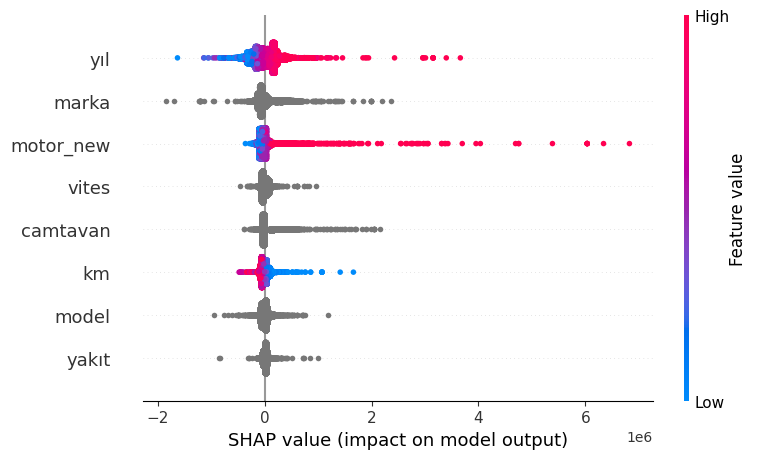

In [62]:
shap.summary_plot(shap_values, X_train)

Modelin son hali flask uygulamasında kullanılmak üzere pickle edilmiştir.

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))